In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import mglearn
import numpy as np

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

print('Форма массива X_poly: {}'.format(X_poly.shape))

Форма массива X_poly: (100, 10)


In [6]:
print('Элементы массива X:\n{}'.format(X[:3]))
print('Элементы массива X_poly:\n{}'.format(X_poly[:3]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]]
Элементы массива X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]]


In [7]:
print('Имена полиномиальных признаков:\n{}'.format(poly.get_feature_names()))

Имена полиномиальных признаков:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


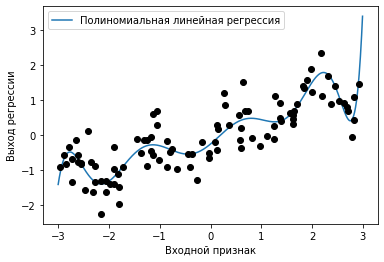

In [8]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Входной признак')
plt.ylabel('Выход регрессии')
plt.legend(loc='best')

In [9]:
from sklearn.svm import SVR

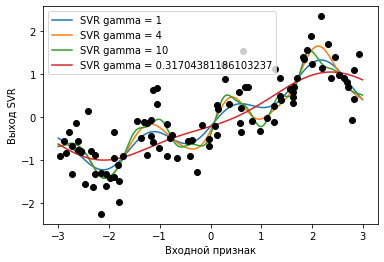

In [10]:
for gamma in [1, 4, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma = {}'.format(gamma))

svr = SVR().fit(X, y)
plt.plot(line, svr.predict(line), label='SVR gamma = {}'.format(svr._gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Входной признак')
plt.ylabel('Выход SVR')
plt.legend(loc='best')

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [12]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('Форма обучающего массива X: {}'.format(X_train.shape))
print('Форма обучающего массива X полиномы и взаимодействия: {}'.format(X_train_poly.shape))

Форма обучающего массива X: (379, 13)
Форма обучающего массива X полиномы и взаимодействия: (379, 105)


In [14]:
print('Имена полиномиальных признаков:\n{}'.format(poly.get_feature_names()))

Имена полиномиальных признаков:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [15]:
ridge = Ridge().fit(X_train_scaled, y_train)
print('Правильность на тестовом наборе без взаимодействий: {}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('Правильность на тестовом наборе с взаимодействиями: {}'.format(ridge.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействий: 0.621458322792103
Правильность на тестовом наборе с взаимодействиями: 0.7534782020980574


In [16]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Правильность на тестовом наборе без взаимодействий: {:.3f}'.format(
    rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Правильность на тестовом наборе с взаимодействиями: {:.3f}'.format(
    rf.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействий: 0.795
Правильность на тестовом наборе с взаимодействиями: 0.759
